# Линейные модели, SVM и деревья решений.

## Подготовка

Загрузка датасета

In [54]:
import pandas as pd
df = pd.read_csv('GM_players_statistics.csv')

In [55]:
df.dtypes

ID                             int64
name                          object
username                      object
profile                       object
user_id                        int64
title                         object
fide                         float64
country                       object
followers                      int64
joined                        object
last_online                   object
current_rapid_rating         float64
highest_rapid_rating         float64
highest_rapid_date            object
rapid_win                    float64
rapid_draw                   float64
rapid_loss                   float64
current_blitz_rating         float64
highest_blitz_rating         float64
highest_blitz_date            object
blitz_win                    float64
blitz_draw                   float64
blitz_loss                   float64
current_bullet_rating        float64
highest_bullet_rating        float64
highest_bullet_date           object
bullet_win                   float64
b

Заполнение пропусков

In [56]:
from sklearn.impute import SimpleImputer

num_cols = []

for col in df.columns:
    temp_null_count = df[df[col].isnull()].shape[0]
    dt = str(df[col].dtype)
    if temp_null_count == 0:
        continue

    imp_strategy=''
    if dt=='float64' or dt=='int64':
        num_cols.append(col)
        imp_strategy = 'mean'
    else:
        imp_strategy = 'most_frequent'

    imp_num = SimpleImputer(strategy=imp_strategy)
    data_num_imp = imp_num.fit_transform(df[[col]])
    df[[col]] = data_num_imp

Матрица корреляций

<Axes: >

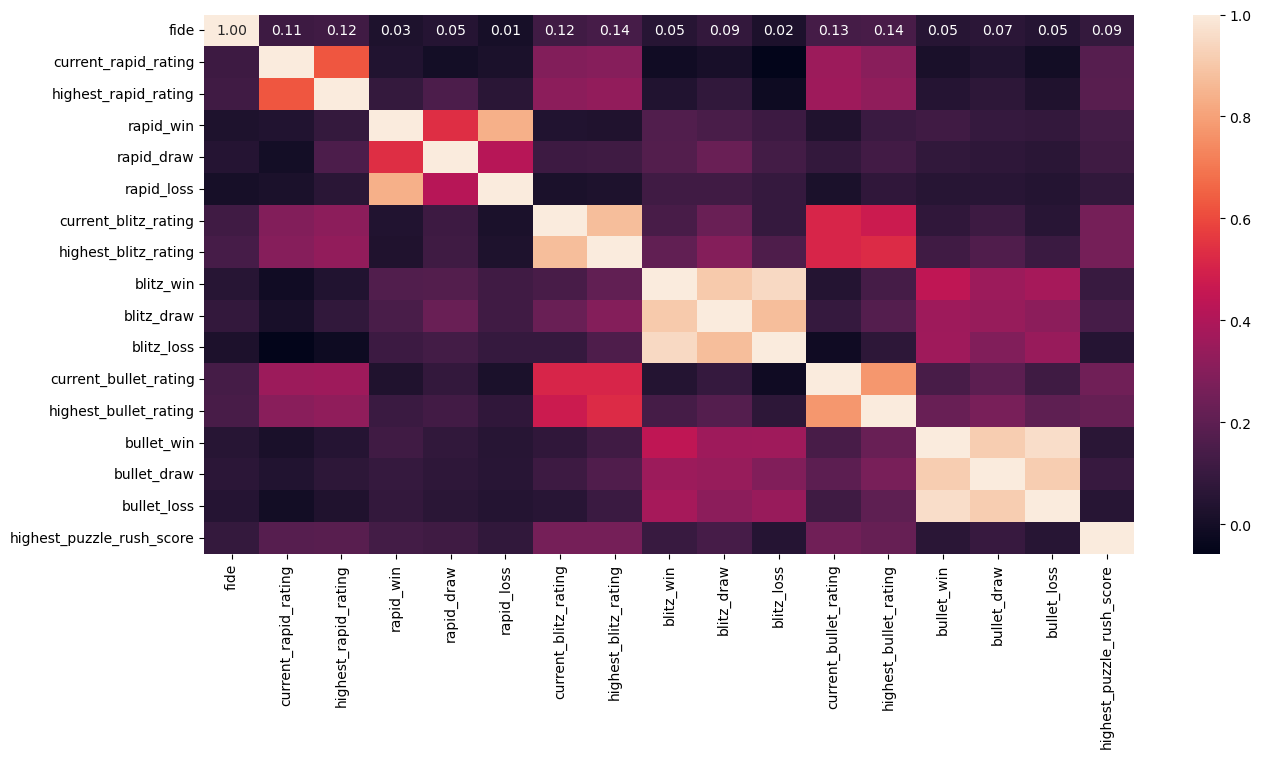

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(15, 7))
sns.heatmap(df[num_cols].corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

Кодирование категориального признака `league`

In [58]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

cat_enc_le = le.fit_transform(df['league'])
df['league_coded'] = cat_enc_le

## Разделение выборки на обучающую и тестовую

In [59]:
from sklearn.model_selection import train_test_split

x_df = df[num_cols].drop(columns='highest_rapid_rating') # числовые колонки

y_df = df['highest_rapid_rating'] # колонка с самым высоким рейтингом по рапиду

x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.25, random_state=42)

## Линейная регрессия

Создаём объект `LinearRegression`, загружаем данные для обучения. Получаем коэффициенты линейной регрессии

In [60]:
from sklearn.linear_model import LinearRegression
import numpy as np

linear_regr = LinearRegression().fit(np.array(x_train), np.array(y_train))
linear_regr.coef_

array([ 0.00678926,  0.41581834, -0.00156536,  0.71790469, -0.00328312,
        0.01749251,  0.02695972, -0.00305505,  0.07226446, -0.009803  ,
        0.07232053,  0.02599858,  0.00233375, -0.03868318,  0.00268067,
        0.27439654])

Предсказанные значения:

In [61]:
y_predict = linear_regr.predict(x_test)
y_predict

/usr/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([1864.10323384, 2556.16594508, 2559.84615056, 2545.19498769,
       2524.74427193, 2649.29263311, 2634.34700348, 2587.34637373,
       2558.4611405 , 2629.2350959 , 2622.78313325, 2637.21241291,
       2584.97135224, 2528.92551904, 2685.58832853, 2558.0389039 ,
       2144.91187336, 2529.46690826, 2541.46790409, 2568.16617438,
       2838.97942723, 2675.94429703, 2563.39088332, 2556.0167851 ,
       2611.88652136, 2570.37888163, 2655.50066417, 2584.16557421,
       2582.29232094, 2504.79304754, 2520.78596772, 2556.16594508,
       2605.19970832, 2711.61701101, 2623.47605116, 2565.21587016,
       2691.83947872, 2524.06706062, 2536.5569937 , 2491.1208013 ,
       2698.2035079 , 2543.0253666 , 2564.10580162, 2766.71468998,
       2546.04022047, 2818.44907716, 2561.50513999, 2544.75348632,
       2359.32342932, 2635.42212756, 2300.20332266, 2559.80364999,
       2563.05763665, 2435.32166126, 2560.89942329, 2490.85617147,
       2469.22494161, 2441.21680246, 1925.56233798, 2522.55218

Оценка качества при помощи `r2_score`

In [62]:
from sklearn.metrics import r2_score, mean_absolute_error

r2_score(y_test, y_predict), mean_absolute_error(y_test, y_predict)

(0.4654381988230094, 104.12757079584122)

## Метод опорных векторов

In [63]:
from sklearn.svm import LinearSVR

linear_svr = LinearSVR(C=1.0, max_iter=10000).fit(x_train, y_train)

/usr/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/lib/python3.11/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [64]:
y_predict_svr = linear_svr.predict(x_test)
y_predict_svr

array([1483.27526869, 2596.59444231, 2580.10571976, 2566.58931182,
       2584.47835432, 2754.24997759, 2702.16371049, 2679.44261241,
       2586.31109243, 2723.51640935, 2773.32088226, 2745.75879734,
       2778.43710737, 2631.23093999, 2859.27054637, 2633.69568555,
       1984.48879895, 2511.60661214, 2494.32704846, 2603.32254977,
       3013.25932863, 2807.59266505, 2684.33929087, 2562.60030077,
       2665.41910595, 2658.52118548, 2725.1799742 , 2669.4830024 ,
       2670.75975131, 2434.44667519, 2566.97373065, 2596.59444231,
       2634.2300333 , 2971.5733687 , 2678.79865364, 2616.42789949,
       2793.36517774, 2524.22315328, 2513.83239524, 2453.4106611 ,
       2818.17806906, 2556.85187844, 2590.37247469, 2909.71297608,
       2573.46817224, 2897.88170364, 2588.05704565, 2494.72214971,
       2245.66750407, 2685.8909209 , 2218.9010784 , 2610.50913689,
       2588.27112656, 2423.45781296, 2561.72941334, 2404.1135333 ,
       2349.16532894, 2477.01356664, 1696.07222731, 2406.45944

In [65]:
r2_score(y_test, y_predict_svr), mean_absolute_error(y_test, y_predict_svr)

(0.26944257450528, 128.06114298576267)

## Дерево решений

Обучение

In [66]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42, max_depth=5) # max_depth задаём, потому что иначе дерево будет слишком большим

In [67]:
tree_reg.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [68]:
tree_predict = tree_reg.predict(x_test)

In [69]:
r2_score(y_test, tree_predict), mean_absolute_error(y_test, tree_predict)

(0.31034587253847723, 102.63443962254959)

Визуализация дерева решений

In [70]:
from sklearn.tree import export_text
from IPython.core.display import HTML

tree_rules = export_text(tree_reg, feature_names=list(x_train.columns))
HTML('<pre>' + tree_rules + '</pre>')

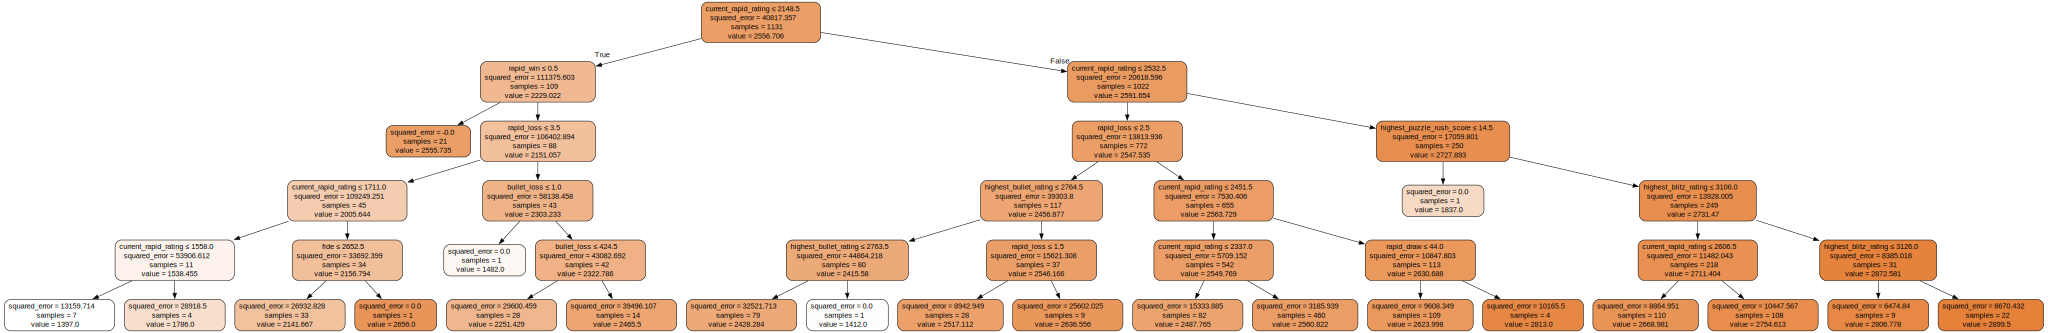

In [71]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(tree_reg, out_file=None, 
                           feature_names=list(x_train.columns),
                           filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)
graph

График, показывающий важность признаков в дереве решений

In [72]:
from operator import itemgetter

def draw_feature_importances(tree_model, X_dataset, figsize=(18,5)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.05, b+0.01, str(round(b,3)))
    plt.show()
    return labels, data


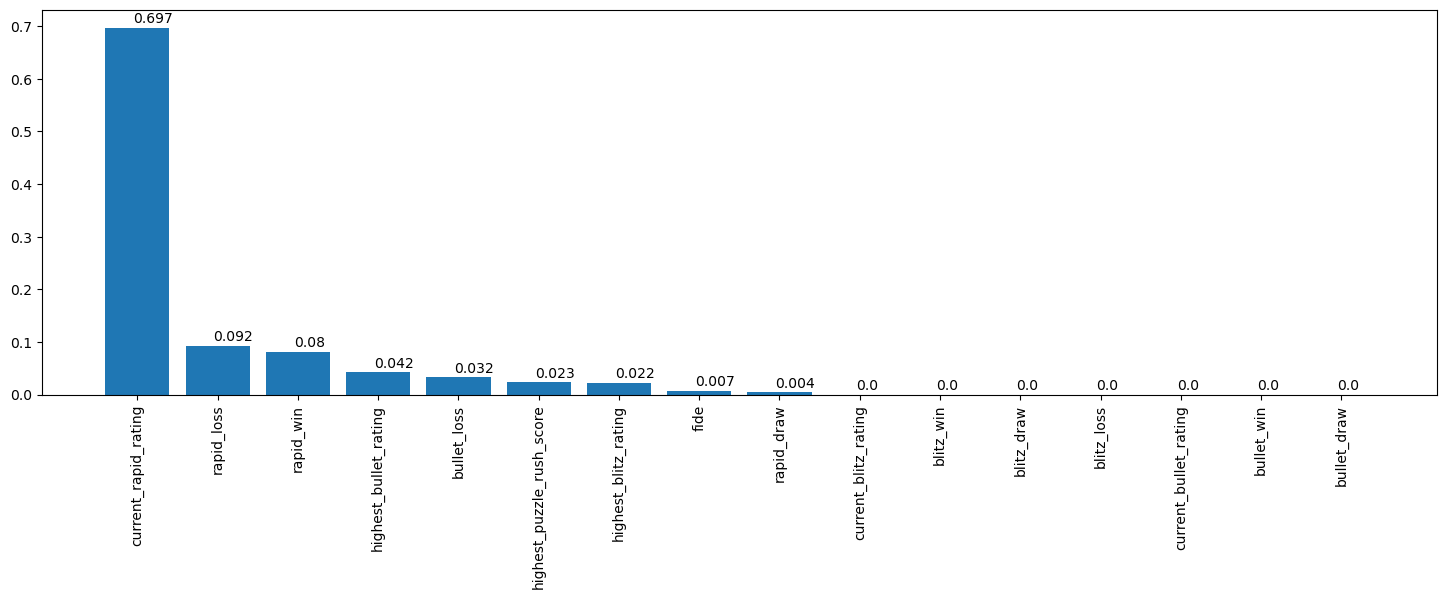

In [73]:
chess_tree_regr_fl, chess_tree_regr_fd = draw_feature_importances(tree_reg, x_df)

## Сравнение оценок каждого метода обучения

In [74]:
r2_score(y_test, y_predict), mean_absolute_error(y_test, y_predict)

(0.4654381988230094, 104.12757079584122)

In [75]:
r2_score(y_test, y_predict_svr), mean_absolute_error(y_test, y_predict_svr)

(0.26944257450528, 128.06114298576267)

In [76]:
r2_score(y_test, tree_predict), mean_absolute_error(y_test, tree_predict)

(0.31034587253847723, 102.63443962254959)